In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump

In [2]:
data=pd.read_csv('Student Performance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,A
1,female,group C,some college,standard,completed,69,90,88,A+
2,female,group B,master's degree,standard,none,90,95,93,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,Re-Appear
4,male,group C,some college,standard,none,76,78,75,A
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,O
996,male,group C,high school,free/reduced,none,62,55,55,B
997,female,group C,high school,free/reduced,completed,59,71,65,B+
998,female,group D,some college,standard,completed,68,78,77,A


### Checking For Null Values

In [3]:
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
Grade                          False
dtype: bool

### Checking For Outliers

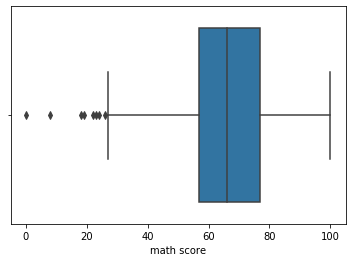

In [4]:
sns.boxplot(data['math score'])

### Resolving the Outliers

In [5]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1
IQR

math score       20.00
reading score    20.00
writing score    21.25
dtype: float64

In [6]:
data = data[~((data<(q1-1.5*IQR))|(data>(q3 + 1.5*IQR))).any(axis=1)]
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,A
1,female,group C,some college,standard,completed,69,90,88,A+
2,female,group B,master's degree,standard,none,90,95,93,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,Re-Appear
4,male,group C,some college,standard,none,76,78,75,A
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,O
996,male,group C,high school,free/reduced,none,62,55,55,B
997,female,group C,high school,free/reduced,completed,59,71,65,B+
998,female,group D,some college,standard,completed,68,78,77,A


### Checking for outliers after resolving

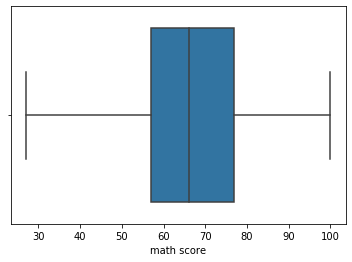

In [7]:
sns.boxplot(data['math score'])

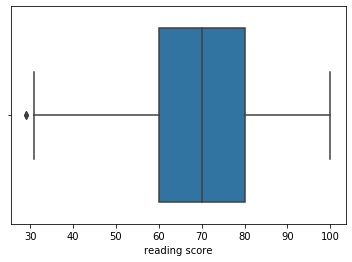

In [8]:
sns.boxplot(data['reading score'])

In [9]:
data.drop(data[data['reading score']==data['reading score'].min()].index.tolist(),inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


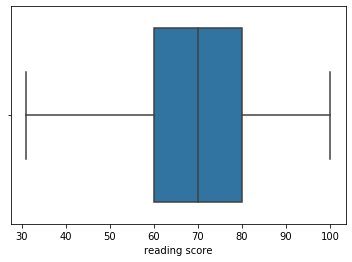

In [10]:
sns.boxplot(data['reading score'])

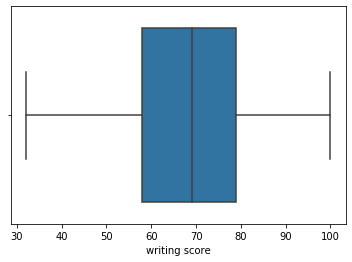

In [11]:
sns.boxplot(data['writing score'])

### Seperating Independent and Dependent Variable

In [12]:
x=data.iloc[:,:-1].values
x

array([['female', 'group B', "bachelor's degree", ..., 72, 72, 74],
       ['female', 'group C', 'some college', ..., 69, 90, 88],
       ['female', 'group B', "master's degree", ..., 90, 95, 93],
       ...,
       ['female', 'group C', 'high school', ..., 59, 71, 65],
       ['female', 'group D', 'some college', ..., 68, 78, 77],
       ['female', 'group D', 'some college', ..., 77, 86, 86]],
      dtype=object)

In [13]:
y=data.iloc[:,-1].values
y

array(['A', 'A+', 'O', 'Re-Appear', 'A', 'A', 'O', 'Re-Appear', 'B+',
       'Re-Appear', 'B', 'Re-Appear', 'A', 'A', 'B', 'A', 'A+',
       'Re-Appear', 'B', 'B+', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'B+',
       'B+', 'A', 'B+', 'B+', 'Re-Appear', 'A+', 'A+', 'A', 'B', 'A+',
       'B', 'B', 'B+', 'B', 'B+', 'B', 'B', 'B+', 'A', 'B+', 'A+', 'B',
       'A', 'Re-Appear', 'A+', 'A+', 'Re-Appear', 'A+', 'B', 'B', 'A',
       'Re-Appear', 'B', 'A', 'B', 'B+', 'Re-Appear', 'B+', 'B', 'B',
       'B+', 'B+', 'Re-Appear', 'B', 'Re-Appear', 'Re-Appear', 'A', 'B+',
       'B+', 'Re-Appear', 'Re-Appear', 'B', 'B+', 'Re-Appear', 'A', 'A+',
       'A', 'B+', 'A+', 'A', 'Re-Appear', 'A', 'Re-Appear', 'A+', 'A+',
       'B+', 'B+', 'B+', 'B+', 'A', 'A', 'A+', 'B', 'O', 'B+', 'O', 'B+',
       'B+', 'B+', 'A+', 'B', 'B', 'B', 'O', 'A', 'A+', 'A', 'B', 'B+',
       'A+', 'O', 'O', 'B', 'A', 'A+', 'B+', 'A', 'A', 'B', 'A+',
       'Re-Appear', 'A', 'A+', 'A', 'B', 'Re-Appear', 'B+', 'B+', 'B+',
      

In [14]:
x.shape

(986, 8)

### Using OneHotEncoder

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
ct = ColumnTransformer([("aj",OneHotEncoder(),[0])],remainder="passthrough") 
x = ct.fit_transform(x)

In [17]:
ct = ColumnTransformer([("aj",OneHotEncoder(),[2])],remainder="passthrough") 
x = ct.fit_transform(x) 

In [18]:
ct = ColumnTransformer([("aj",OneHotEncoder(),[7])],remainder="passthrough") 
x = ct.fit_transform(x)

In [19]:
ct = ColumnTransformer([("aj",OneHotEncoder(),[13])],remainder="passthrough") 
x = ct.fit_transform(x)

In [20]:
ct = ColumnTransformer([("aj",OneHotEncoder(),[15])],remainder="passthrough") 
x = ct.fit_transform(x)

In [21]:
x.shape

(986, 20)

### Removing the dummy column

In [22]:
x=x[:,1:]
x.shape

(986, 19)

### Using LabelEncoder For Dependent Variable

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lab=LabelEncoder()

In [25]:
y=lab.fit_transform(y)
y

array([0, 1, 4, 5, 0, 0, 4, 5, 3, 5, 2, 5, 0, 0, 2, 0, 1, 5, 2, 3, 0, 2,
       0, 0, 0, 2, 0, 3, 3, 0, 3, 3, 5, 1, 1, 0, 2, 1, 2, 2, 3, 2, 3, 2,
       2, 3, 0, 3, 1, 2, 0, 5, 1, 1, 5, 1, 2, 2, 0, 5, 2, 0, 2, 3, 5, 3,
       2, 2, 3, 3, 5, 2, 5, 5, 0, 3, 3, 5, 5, 2, 3, 5, 0, 1, 0, 3, 1, 0,
       5, 0, 5, 1, 1, 3, 3, 3, 3, 0, 0, 1, 2, 4, 3, 4, 3, 3, 3, 1, 2, 2,
       2, 4, 0, 1, 0, 2, 3, 1, 4, 4, 2, 0, 1, 3, 0, 0, 2, 1, 5, 0, 1, 0,
       2, 5, 3, 3, 3, 0, 3, 2, 5, 0, 1, 3, 0, 4, 3, 0, 3, 2, 3, 1, 0, 3,
       0, 3, 0, 1, 2, 2, 1, 4, 2, 0, 0, 0, 0, 1, 1, 3, 5, 1, 2, 0, 3, 4,
       3, 2, 5, 3, 5, 3, 0, 3, 5, 1, 3, 0, 3, 3, 0, 2, 3, 2, 2, 0, 0, 0,
       0, 3, 5, 0, 3, 0, 0, 3, 0, 2, 2, 1, 1, 1, 5, 0, 2, 3, 1, 3, 1, 3,
       2, 0, 2, 3, 4, 3, 5, 0, 1, 1, 0, 3, 3, 2, 1, 3, 1, 2, 2, 0, 0, 0,
       3, 3, 3, 5, 0, 3, 0, 2, 3, 3, 0, 0, 0, 0, 0, 5, 4, 0, 5, 0, 0, 4,
       0, 3, 5, 2, 3, 1, 0, 4, 3, 0, 3, 5, 5, 0, 0, 5, 1, 1, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 5, 0, 5, 1, 1, 2, 0, 0, 0, 3,

### Data Visualization

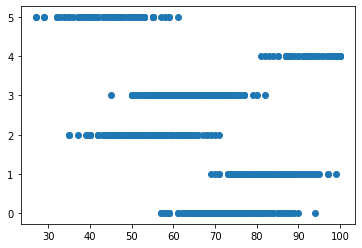

In [26]:
plt.scatter(data['math score'],y)

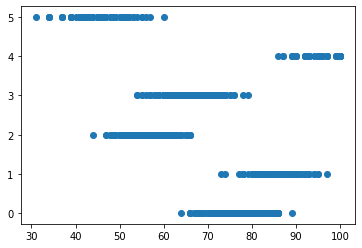

In [27]:
plt.scatter(data['reading score'],y)

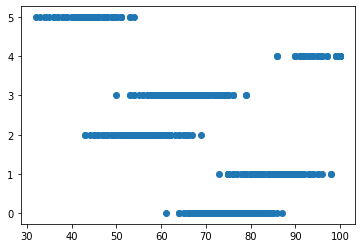

In [28]:
plt.scatter(data['writing score'],y)

### Spliting data's for Training and Testing purpose

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.01,random_state=0)

In [31]:
x_train

array([[0.0, 0.0, 1.0, ..., 76, 70, 69],
       [1.0, 0.0, 1.0, ..., 85, 92, 85],
       [1.0, 0.0, 1.0, ..., 45, 59, 64],
       ...,
       [1.0, 0.0, 1.0, ..., 76, 74, 73],
       [0.0, 1.0, 0.0, ..., 61, 71, 78],
       [1.0, 0.0, 1.0, ..., 49, 63, 56]], dtype=object)

In [32]:
y_train

array([0, 1, 2, 5, 3, 2, 0, 5, 5, 1, 4, 2, 3, 4, 3, 1, 3, 0, 3, 3, 0, 5,
       0, 1, 0, 5, 1, 2, 0, 1, 4, 1, 3, 2, 2, 1, 3, 0, 3, 3, 3, 2, 2, 2,
       0, 0, 3, 3, 0, 0, 0, 2, 0, 3, 2, 3, 2, 0, 2, 0, 0, 1, 2, 2, 5, 2,
       3, 1, 5, 0, 5, 1, 0, 2, 1, 3, 3, 5, 3, 3, 2, 3, 2, 0, 1, 0, 2, 0,
       1, 5, 0, 2, 0, 1, 4, 3, 3, 1, 0, 0, 3, 5, 0, 4, 3, 0, 3, 0, 3, 3,
       3, 2, 0, 4, 5, 4, 2, 3, 4, 0, 0, 0, 0, 5, 1, 0, 3, 1, 2, 2, 0, 1,
       0, 1, 2, 0, 0, 0, 3, 1, 2, 0, 3, 5, 5, 4, 4, 3, 3, 0, 0, 0, 0, 5,
       1, 1, 0, 0, 1, 1, 2, 3, 1, 2, 4, 0, 3, 0, 3, 0, 0, 3, 1, 1, 1, 3,
       1, 0, 2, 0, 2, 0, 1, 3, 1, 2, 0, 0, 2, 0, 3, 3, 3, 1, 3, 2, 0, 0,
       2, 1, 2, 1, 0, 2, 2, 2, 3, 2, 3, 3, 2, 5, 2, 0, 0, 3, 4, 3, 3, 2,
       1, 3, 3, 3, 3, 3, 5, 1, 3, 3, 1, 1, 5, 1, 3, 5, 0, 0, 5, 2, 3, 0,
       3, 5, 5, 1, 1, 1, 3, 0, 2, 0, 2, 1, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3,
       0, 2, 3, 1, 3, 0, 1, 3, 4, 2, 2, 3, 3, 1, 3, 2, 4, 2, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 3, 3, 5, 3, 1,

In [33]:
x_test

array([[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 0.0, 1.0, 63, 66, 67],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 1.0, 0.0, 57, 78, 79],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 1.0, 70, 70, 65],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 1.0, 0.0, 82, 97, 96],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 0.0, 1.0, 81, 74, 71],
       [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        0.0, 1.0, 0.0, 65, 85, 76],
       [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 1.0, 0.0, 73, 83, 76],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 0.0, 1.0, 89, 87, 79],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 1.0, 67, 57, 59],
       [1.0, 1.0, 0

In [34]:
y_test

array([3, 0, 3, 4, 0, 0, 0, 1, 3, 0])

### Building the Model

In [35]:
from sklearn.naive_bayes import GaussianNB
na_by=GaussianNB()

### Training the Model

In [36]:
na_by.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Saving the model in a file to use it in application

In [37]:
dump(na_by,"Student Grade Prediction Model.txt")

['Student Grade Prediction Model.txt']

### Predicting the output

In [38]:
y_pred=na_by.predict(x_test)
y_pred

array([3, 0, 3, 4, 0, 0, 0, 1, 2, 0])

### Changing numbers to grade

In [39]:
predict_grade=[]
for i in y_pred:
    if i==0:
        predict_grade.append('A')
    elif i==1:
        predict_grade.append('A+')
    elif i==2:
        predict_grade.append('B')
    elif i==3:
        predict_grade.append('B+')
    elif i==4:
        predict_grade.append('O')
    else:
        predict_grade.append('Re-Appear')

In [40]:
predict_grade

['B+', 'A', 'B+', 'O', 'A', 'A', 'A', 'A+', 'B', 'A']

### Finding the Accuracy

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.9